In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import f1_score,recall_score,precision_score
import matplotlib.pylab as plt


In [3]:
data = pd.read_csv('BikeBuyers.csv')

In [4]:
data.head()

,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,NumberCarsOwned,CommuteDistance,Age,BikeBuyer
0,90000,2,0,Bachelors,0,1-2 Miles,49,1
1,60000,3,3,Bachelors,1,0-1 Miles,50,1
2,60000,3,3,Bachelors,1,2-5 Miles,50,1
3,70000,0,0,Bachelors,1,5-10 Miles,47,1
4,80000,5,5,Bachelors,4,1-2 Miles,47,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   YearlyIncome          18484 non-null  int64 
 1   TotalChildren         18484 non-null  int64 
 2   NumberChildrenAtHome  18484 non-null  int64 
 3   EnglishEducation      18484 non-null  object
 4   NumberCarsOwned       18484 non-null  int64 
 5   CommuteDistance       18484 non-null  object
 6   Age                   18484 non-null  int64 
 7   BikeBuyer             18484 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.isna().sum()

YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
NumberCarsOwned         0
CommuteDistance         0
Age                     0
BikeBuyer               0
dtype: int64

In [8]:
data.shape

(18484, 8)

In [16]:
#transform the data
data = pd.get_dummies(data)

In [17]:
data.shape

(18484, 16)

In [18]:
x = data.drop('BikeBuyer',axis = 1)
y = data['BikeBuyer']

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [38]:
model = DecisionTreeClassifier()

In [41]:
#default parameters
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': 1000,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [121]:
#will try all parameter as per lab assignment phase
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
}


In [122]:
tunedmodel = GridSearchCV(model,decision_tree_params)

In [123]:
tunedmodel

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=100,
                                              max_leaf_nodes=1000),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2, 0.3],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']})

In [124]:
tunedmodel.fit(xtrain,ytrain)

KeyboardInterrupt: 

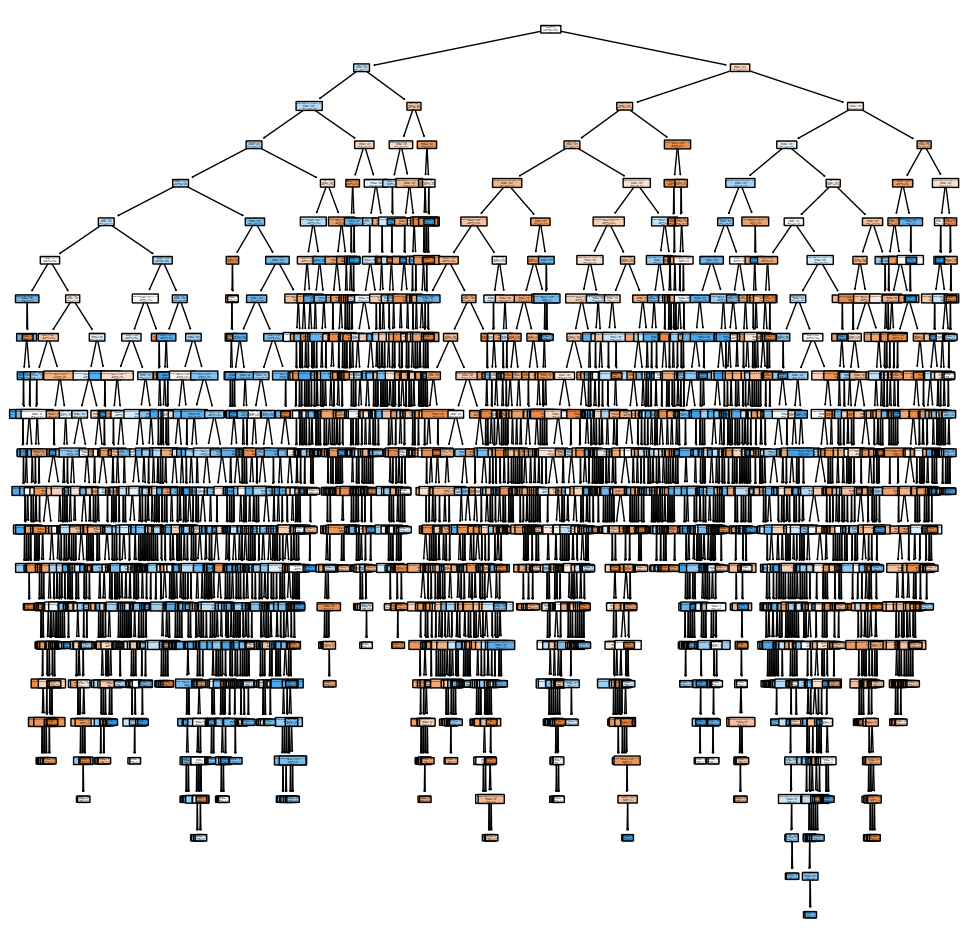

In [111]:
#visulize decesion tree
best_decision_tree = tunedmodel.best_estimator_
targ = list(data.BikeBuyer)
targ = [str(x) for x in targ]
plt.figure(figsize=(12, 12))
plot_tree(best_decision_tree, filled=True, feature_names=list(data.columns), class_names=targ, rounded=True)
plt.show()

In [ ]:
tunedmodel.score(xtest,ytest)

In [59]:
preds = tunedmodel.predict(xtest)
true = ytest

__accuracy__

In [60]:
''' 
F1 Score < 0.5: This suggests poor model performance.
F1 Score between 0.5 and 0.7: This indicates moderate model performance.
F1 Score > 0.7: This suggests good to excellent model performance.
'''

f1_score(preds,true)
recall_score(preds,true)
precision_score(preds,true)

0.7794776119402984

In [120]:
#10 crossval score is made and geting bext accuracy
cross_val = cross_val_score(estimator=model,X=x,y=y,cv=10)
max(cross_val)

0.8593073593073594